<a href="https://colab.research.google.com/github/belovelace/Machine_learning_class/blob/main/Activity_SeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [44]:
# 파일 가져오기
from google.colab import drive
drive.mount('/content/drive')

TRAIN = "train/"
TEST = "test/"

DATASET_PATH = "/content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
def load_dataset():
    """Loads the UCI HAR dataset from the specified paths."""
    # Define paths to the data files
    train_x_path = os.path.join(DATASET_PATH, TRAIN, 'X_train.txt')
    train_y_path = os.path.join(DATASET_PATH, TRAIN, 'y_train.txt')
    test_x_path = os.path.join(DATASET_PATH, TEST, 'X_test.txt')
    test_y_path = os.path.join(DATASET_PATH, TEST, 'y_test.txt')

    print(f"Loading training data from: {train_x_path}")
    print(f"Loading training labels from: {train_y_path}")
    print(f"Loading testing data from: {test_x_path}")
    print(f"Loading testing labels from: {test_y_path}")

    # Load data using numpy for efficiency with large numerical datasets
    # These files usually contain space-separated floats or integers
    trainX = np.loadtxt(train_x_path)
    trainy = np.loadtxt(train_y_path)
    testX = np.loadtxt(test_x_path)
    testy = np.loadtxt(test_y_path)

    return trainX, trainy, testX, testy

In [46]:
df = load_dataset()

Loading training data from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt
Loading training labels from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt
Loading testing data from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt
Loading testing labels from: /content/drive/MyDrive/AI_study/human activity/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt


In [47]:


# Convert NumPy arrays in the tuple to pandas DataFrames for better visualization
trainX_df = pd.DataFrame(df[0].reshape(-1, df[0].shape[-1]))
trainy_df = pd.DataFrame(df[1])
testX_df = pd.DataFrame(df[2].reshape(-1, df[2].shape[-1]))
testy_df = pd.DataFrame(df[3])

# Define a mapping from numerical labels to activity names
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

print("Training Data (X):")
display(trainX_df.head())

print("\nTraining Labels (y):")
# Map numerical labels to activity names for display
display(trainy_df.head().replace(activity_labels))

print("\nTesting Data (X):")
display(testX_df.head())

print("\nTesting Labels (y):")
# Map numerical labels to activity names for display
display(testy_df.head().replace(activity_labels))

Training Data (X):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892



Training Labels (y):


,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING



Testing Data (X):


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857



Testing Labels (y):


,0
0,STANDING
1,STANDING
2,STANDING
3,STANDING
4,STANDING


In [48]:

print("Testing Labels (y) - 실제 값들:")
print("첫 5개 라벨:", df[3][:5])  # 실제 라벨 값
print("라벨별 개수:")
unique, counts = np.unique(df[3], return_counts=True)
for label, count in zip(unique, counts):
    print(f"{label}: {activity_labels[label]} - {count}개")

Testing Labels (y) - 실제 값들:
첫 5개 라벨: [5. 5. 5. 5. 5.]
라벨별 개수:
1.0: WALKING - 496개
2.0: WALKING_UPSTAIRS - 471개
3.0: WALKING_DOWNSTAIRS - 420개
4.0: SITTING - 491개
5.0: STANDING - 532개
6.0: LAYING - 537개


In [49]:
# 실제 라벨 값들 확인
print("Training labels unique values:", np.unique(df[1]))
print("Testing labels unique values:", np.unique(df[3]))
print("Training labels shape:", df[1].shape)
print("Testing labels shape:", df[3].shape)

Training labels unique values: [1. 2. 3. 4. 5. 6.]
Testing labels unique values: [1. 2. 3. 4. 5. 6.]
Training labels shape: (7352,)
Testing labels shape: (2947,)


# 모델 구현

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [51]:
class ImprovedSEBlock(layers.Layer):
    """
    개선된 SE 블록 - 학습 안정성 향상
    """
    def __init__(self, channels, reduction=16, name=None, **kwargs):
        super(ImprovedSEBlock, self).__init__(name=name, **kwargs)
        self.channels = channels
        self.reduction = reduction

        # 더 안정적인 초기화
        self.global_pool = layers.GlobalAveragePooling1D()

        reduced_channels = max(1, channels // reduction)

        # 더 보수적인 활성화 함수와 초기화
        self.dense1 = layers.Dense(
            reduced_channels,
            activation='relu',
            kernel_initializer='he_normal',  # 안정적인 초기화
            kernel_regularizer=keras.regularizers.l2(1e-4),  # 정규화 추가
            name=f"{name}_dense1"
        )

        self.dense2 = layers.Dense(
            channels,
            activation='sigmoid',
            kernel_initializer='glorot_normal',  # 안정적인 초기화
            kernel_regularizer=keras.regularizers.l2(1e-4),  # 정규화 추가
            name=f"{name}_dense2"
        )

        self.reshape = layers.Reshape((1, channels))
        self.dropout = layers.Dropout(0.1)  # SE 내부에도 약간의 드롭아웃

    def call(self, inputs, training=None):
        # Squeeze
        squeezed = self.global_pool(inputs)

        # Excitation with regularization
        excited = self.dense1(squeezed)
        excited = self.dropout(excited, training=training)  # 드롭아웃 추가
        channel_weights = self.dense2(excited)

        # Scale
        channel_weights = self.reshape(channel_weights)

        # Residual connection for stability
        return inputs * (0.5 + 0.5 * channel_weights)  # 0.5~1.0 범위로 제한

In [52]:
def create_stable_se_model(input_features=561, num_classes=6):
    """
    학습 안정성을 크게 개선한 SE 모델
    """
    print("🔧 안정적인 SE 모델 생성:")

    inputs = layers.Input(shape=(input_features,), name='input')

    # 더 간단한 입력 변환 (과적합 방지)
    x = layers.Dense(256, activation='relu',
                     kernel_regularizer=keras.regularizers.l2(1e-3),
                     name='dense_transform')(inputs)
    x = layers.Dropout(0.1)(x)  # 초기부터 드롭아웃
    x = layers.BatchNormalization()(x)

    # 1D CNN을 위한 reshape (더 보수적)
    x = layers.Reshape((16, 16))(x)  # 256 = 16 * 16

    #  첫 번째 블록 (더 보수적인 설정)
    x = layers.Conv1D(32, 3, padding='same',
                      kernel_regularizer=keras.regularizers.l2(1e-3))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = ImprovedSEBlock(32, reduction=4, name='se1')(x)  # 압축비 줄임
    x = layers.Dropout(0.2)(x)

    #  두 번째 블록
    x = layers.Conv1D(16, 3, padding='same',
                      kernel_regularizer=keras.regularizers.l2(1e-3))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = ImprovedSEBlock(16, reduction=4, name='se2')(x)
    x = layers.Dropout(0.)(x)

    # Global pooling + 분류
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.2)(x)

    # 더 간단한 분류기
    x = layers.Dense(32, activation='relu',
                     kernel_regularizer=keras.regularizers.l2(1e-3))(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = keras.Model(inputs, outputs, name='Stable_SE_Model')

    print(f"    안정적인 모델 생성 완료!")
    print(f"    파라미터 수: {model.count_params():,}개 (기존보다 훨씬 적음)")

    return model

In [53]:
def get_stable_training_config():
    """안정적인 훈련을 위한 설정"""

    #  핵심: 매우 낮은 학습률
    optimizer = keras.optimizers.Adam(
        learning_rate=0.00005,  # 기존의 1/10로 감소!
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-7
    )

    #  더 공격적인 Early Stopping
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',  # validation loss 모니터링
        patience=5,  # 더 빠른 조기 종료
        restore_best_weights=True,
        verbose=1,
        mode='min'
    )

    #  더 민감한 학습률 감소
    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,  # 더 많이 감소
        patience=3,  # 더 빨리 감소
        min_lr=1e-6,
        verbose=1
    )

    #  학습률 스케줄링
    def lr_schedule(epoch):
        """에포크에 따른 학습률 감소"""
        if epoch < 10:
            return 0.0001
        elif epoch < 20:
            return 0.00005
        else:
            return 0.00001

    lr_scheduler = keras.callbacks.LearningRateScheduler(lr_schedule, verbose=1)

    return optimizer, [early_stopping, reduce_lr]

In [54]:
# ============================================================
# 4단계: 모델 생성 및 컴파일
# ============================================================
print("\n 안정적인 SE 모델 생성...")
stable_model = create_stable_se_model()

# 모델 구조 확인
stable_model.summary()

# 안정적인 설정으로 컴파일
optimizer, callbacks = get_stable_training_config()

stable_model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n✅ 모델 컴파일 완료 - 안정적인 설정 적용!")


 안정적인 SE 모델 생성...
🔧 안정적인 SE 모델 생성:
    안정적인 모델 생성 완료!
    파라미터 수: 149,650개 (기존보다 훨씬 적음)


Model: "Stable_SE_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 561)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_transform (Dense)         │ (None, 256)            │       143,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 16, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 16, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ se1 (ImprovedSEBlock)           │ (None, 16, 32)         │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 16, 16)         │         1,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ se2 (ImprovedSEBlock)           │ (None, 16, 16)         │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 149,650 (584.57 KB)

 Trainable params: 149,042 (582.20 KB)

 Non-trainable params: 608 (2.38 KB)


✅ 모델 컴파일 완료 - 안정적인 설정 적용!


In [55]:
# ============================================================
# 6단계: 모델 훈련
# ============================================================

print(f"\n" + "="*60)
print("🚀 모델 훈련")
print("="*60)

# Define X_train_scaled and y_train using the loaded dataset 'df'
X_train_scaled = df[0]  # Assuming df[0] contains the training features
y_train = df[1]         # Assuming df[1] contains the training labels
testy = df[3]           # Get test labels for later use (also need adjustment)

# IMPORTANT: Adjust labels from 1-indexed to 0-indexed for sparse_categorical_crossentropy
y_train = y_train - 1
testy = testy - 1

# 훈련 콜백 설정
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1
    ),
    keras.callbacks.ModelCheckpoint(
        'best_se_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

print(f"📋 훈련 설정:")
print(f"   배치 크기: 32")
print(f"   에포크: 50")
print(f"   검증 비율: 20%")
print(f"   콜백: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint")

# 안정적인 훈련
history = stable_model.fit(
    X_train_scaled, y_train,
    batch_size=32,  # 더 작은 배치
    epochs=50,
    validation_split=0.2,  # 더 많은 검증 데이터
    callbacks=callbacks,
    verbose=1,
    shuffle=True
)


🚀 모델 훈련
📋 훈련 설정:
   배치 크기: 32
   에포크: 50
   검증 비율: 20%
   콜백: EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
Epoch 1/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1748 - loss: 2.2373
Epoch 1: val_accuracy improved from -inf to 0.32427, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.1760 - loss: 2.2353 - val_accuracy: 0.3243 - val_loss: 2.0843 - learning_rate: 5.0000e-05
Epoch 2/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3011 - loss: 2.0295
Epoch 2: val_accuracy improved from 0.32427 to 0.38273, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.3012 - loss: 2.0290 - val_accuracy: 0.3827 - val_loss: 1.8936 - learning_rate: 5.0000e-05
Epoch 3/50
183/184 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3531 - loss: 1.9087
Epoch 3: val_accuracy improved from 0.38273 to 0.45955, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3531 - loss: 1.9085 - val_accuracy: 0.4596 - val_loss: 1.7565 - learning_rate: 5.0000e-05
Epoch 4/50
179/184 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3786 - loss: 1.8151
Epoch 4: val_accuracy improved from 0.45955 to 0.52821, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3790 - loss: 1.8144 - val_accuracy: 0.5282 - val_loss: 1.6365 - learning_rate: 5.0000e-05
Epoch 5/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4469 - loss: 1.7215
Epoch 5: val_accuracy improved from 0.52821 to 0.72400, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4470 - loss: 1.7214 - val_accuracy: 0.7240 - val_loss: 1.5284 - learning_rate: 5.0000e-05
Epoch 6/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5334 - loss: 1.6206
Epoch 6: val_accuracy improved from 0.72400 to 0.79606, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5340 - loss: 1.6198 - val_accuracy: 0.7961 - val_loss: 1.4274 - learning_rate: 5.0000e-05
Epoch 7/50
181/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5999 - loss: 1.5150
Epoch 7: val_accuracy improved from 0.79606 to 0.82121, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6000 - loss: 1.5147 - val_accuracy: 0.8212 - val_loss: 1.3056 - learning_rate: 5.0000e-05
Epoch 8/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6376 - loss: 1.4334
Epoch 8: val_accuracy improved from 0.82121 to 0.88715, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6383 - loss: 1.4325 - val_accuracy: 0.8872 - val_loss: 1.2145 - learning_rate: 5.0000e-05
Epoch 9/50
179/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6967 - loss: 1.3212
Epoch 9: val_accuracy improved from 0.88715 to 0.90415, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6970 - loss: 1.3205 - val_accuracy: 0.9041 - val_loss: 1.0850 - learning_rate: 5.0000e-05
Epoch 10/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7246 - loss: 1.2358
Epoch 10: val_accuracy improved from 0.90415 to 0.92522, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7247 - loss: 1.2354 - val_accuracy: 0.9252 - val_loss: 0.9955 - learning_rate: 5.0000e-05
Epoch 11/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7434 - loss: 1.1479
Epoch 11: val_accuracy did not improve from 0.92522
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7435 - loss: 1.1478 - val_accuracy: 0.9245 - val_loss: 0.9083 - learning_rate: 5.0000e-05
Epoch 12/50
183/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7810 - loss: 1.0603
Epoch 12: val_accuracy improved from 0.92522 to 0.93338, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7811 - loss: 1.0601 - val_accuracy: 0.9334 - val_loss: 0.8181 - learning_rate: 5.0000e-05
Epoch 13/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8051 - loss: 0.9815
Epoch 13: val_accuracy improved from 0.93338 to 0.94290, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8050 - loss: 0.9814 - val_accuracy: 0.9429 - val_loss: 0.7390 - learning_rate: 5.0000e-05
Epoch 14/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8308 - loss: 0.9209
Epoch 14: val_accuracy did not improve from 0.94290
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8309 - loss: 0.9205 - val_accuracy: 0.9347 - val_loss: 0.6894 - learning_rate: 5.0000e-05
Epoch 15/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8396 - loss: 0.8601
Epoch 15: val_accuracy did not improve from 0.94290
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8396 - loss: 0.8601 - val_accuracy: 0.9422 - val_loss: 0.6505 - learning_rate: 5.0000e-05
Epoch 16/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8601 - loss: 0.8142
Epoch 16: val_accuracy improved from 0.94290 to 0.94833, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8601 - loss: 0.8141 - val_accuracy: 0.9483 - val_loss: 0.5880 - learning_rate: 5.0000e-05
Epoch 17/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8650 - loss: 0.7630
Epoch 17: val_accuracy did not improve from 0.94833
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8651 - loss: 0.7628 - val_accuracy: 0.9436 - val_loss: 0.5605 - learning_rate: 5.0000e-05
Epoch 18/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8831 - loss: 0.7233
Epoch 18: val_accuracy improved from 0.94833 to 0.95105, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8831 - loss: 0.7230 - val_accuracy: 0.9511 - val_loss: 0.5143 - learning_rate: 5.0000e-05
Epoch 19/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8863 - loss: 0.6959
Epoch 19: val_accuracy did not improve from 0.95105
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8864 - loss: 0.6956 - val_accuracy: 0.9490 - val_loss: 0.4891 - learning_rate: 5.0000e-05
Epoch 20/50
181/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8975 - loss: 0.6428
Epoch 20: val_accuracy improved from 0.95105 to 0.95513, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8975 - loss: 0.6427 - val_accuracy: 0.9551 - val_loss: 0.4588 - learning_rate: 5.0000e-05
Epoch 21/50
181/184 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9120 - loss: 0.6173
Epoch 21: val_accuracy did not improve from 0.95513
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9120 - loss: 0.6170 - val_accuracy: 0.9449 - val_loss: 0.4400 - learning_rate: 5.0000e-05
Epoch 22/50
179/184 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9183 - loss: 0.5906
Epoch 22: val_accuracy did not improve from 0.95513
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9182 - loss: 0.5904 - val_accuracy: 0.9511 - val_loss: 0.4390 - learning_rate: 5.0000e-05
Epoch 23/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9208 - loss: 0.5741
Epoch 23: val_accuracy improved from 0.95513 to 0.95649, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9210 - loss: 0.5736 - val_accuracy: 0.9565 - val_loss: 0.4088 - learning_rate: 5.0000e-05
Epoch 24/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9280 - loss: 0.5379
Epoch 24: val_accuracy did not improve from 0.95649
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9280 - loss: 0.5378 - val_accuracy: 0.9551 - val_loss: 0.3970 - learning_rate: 5.0000e-05
Epoch 25/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9300 - loss: 0.5193
Epoch 25: val_accuracy did not improve from 0.95649
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9300 - loss: 0.5192 - val_accuracy: 0.9538 - val_loss: 0.3864 - learning_rate: 5.0000e-05
Epoch 26/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9307 - loss: 0.5077
Epoch 26: val_accuracy did not improve from 0.95649
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9308 - loss: 0.5076 - val_accuracy: 0.9545 - val_loss: 0.3599 - learning_rate: 5.0000e-05

184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9448 - loss: 0.4521 - val_accuracy: 0.9572 - val_loss: 0.3528 - learning_rate: 5.0000e-05
Epoch 30/50
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9420 - loss: 0.4441
Epoch 30: val_accuracy did not improve from 0.95717
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9420 - loss: 0.4441 - val_accuracy: 0.9497 - val_loss: 0.3529 - learning_rate: 5.0000e-05
Epoch 31/50
180/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9429 - loss: 0.4267
Epoch 31: val_accuracy did not improve from 0.95717
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9428 - loss: 0.4268 - val_accuracy: 0.9531 - val_loss: 0.3622 - learning_rate: 5.0000e-05
Epoch 32/50
183/184 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9465 - loss: 0.4205
Epoch 32: val_accuracy improved from 0.95717 to 0.95785, saving model to best_se_model.h5


184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9465 - loss: 0.4204 - val_accuracy: 0.9579 - val_loss: 0.3453 - learning_rate: 5.0000e-05
Epoch 33/50
181/184 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9510 - loss: 0.4058
Epoch 33: val_accuracy did not improve from 0.95785
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9510 - loss: 0.4057 - val_accuracy: 0.9545 - val_loss: 0.3322 - learning_rate: 5.0000e-05
Epoch 34/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9509 - loss: 0.3927
Epoch 34: val_accuracy did not improve from 0.95785
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9508 - loss: 0.3928 - val_accuracy: 0.9538 - val_loss: 0.3293 - learning_rate: 5.0000e-05
Epoch 35/50
181/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9436 - loss: 0.4068
Epoch 35: val_accuracy did not improve from 0.95785
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9437 - loss: 0.4066 - val_accuracy: 0.9538 - val_loss: 0.3229 - learning_rate: 5.0000e-0

184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9547 - loss: 0.3581 - val_accuracy: 0.9606 - val_loss: 0.3106 - learning_rate: 5.0000e-05
Epoch 41/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9517 - loss: 0.3639
Epoch 41: val_accuracy did not improve from 0.96057
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9517 - loss: 0.3639 - val_accuracy: 0.9483 - val_loss: 0.3292 - learning_rate: 5.0000e-05
Epoch 42/50
183/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9468 - loss: 0.3670
Epoch 42: val_accuracy did not improve from 0.96057
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9468 - loss: 0.3669 - val_accuracy: 0.9558 - val_loss: 0.2997 - learning_rate: 5.0000e-05
Epoch 43/50
179/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9542 - loss: 0.3489
Epoch 43: val_accuracy did not improve from 0.96057
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9543 - loss: 0.3487 - val_accuracy: 0.9592 - val_loss: 0.2983 - learning_rate: 5.0000e-05

184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9535 - loss: 0.3431 - val_accuracy: 0.9613 - val_loss: 0.2971 - learning_rate: 5.0000e-05
Epoch 45/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9598 - loss: 0.3377
Epoch 45: val_accuracy did not improve from 0.96125
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9598 - loss: 0.3375 - val_accuracy: 0.9592 - val_loss: 0.3000 - learning_rate: 5.0000e-05
Epoch 46/50
182/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9491 - loss: 0.3483
Epoch 46: val_accuracy did not improve from 0.96125
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9492 - loss: 0.3481 - val_accuracy: 0.9579 - val_loss: 0.2867 - learning_rate: 5.0000e-05
Epoch 47/50
181/184 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9575 - loss: 0.3302
Epoch 47: val_accuracy did not improve from 0.96125
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9575 - loss: 0.3302 - val_accuracy: 0.9565 - val_loss: 0.2875 - learning_rate: 5.0000e-0

In [56]:
# ============================================================
# 7단계: 모델 평가
# ============================================================

print(f"\n" + "="*60)
print("📊 모델 평가")
print("="*60)

# 테스트 데이터 준비
X_test_scaled = df[2]  # df[2]에 테스트 특성이 있다고 가정
y_test = testy         # 훈련 단계에서 이미 0-indexed로 변환된 testy 사용

# 테스트 데이터로 평가
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"🎯 최종 테스트 결과:")
print(f"   테스트 손실: {test_loss:.4f}")
print(f"   테스트 정확도: {test_accuracy:.4f} ({test_accuracy*100:.1f}%)")


📊 모델 평가
🎯 최종 테스트 결과:
   테스트 손실: 0.2059
   테스트 정확도: 0.9450 (94.5%)


93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


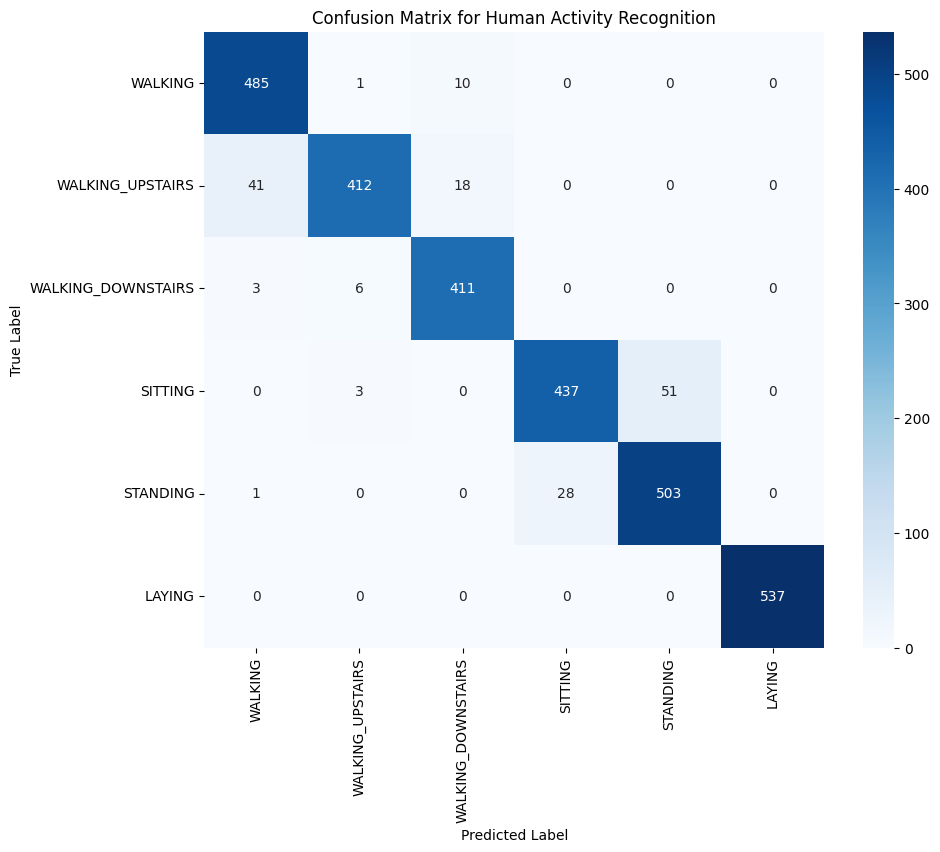

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 수행
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 활동 레이블 정의 (0-indexed)
activity_labels_0_indexed = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING'
}

# 혼동 행렬 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=[activity_labels_0_indexed[i] for i in sorted(activity_labels_0_indexed.keys())],
            yticklabels=[activity_labels_0_indexed[i] for i in sorted(activity_labels_0_indexed.keys())])
plt.title('Confusion Matrix for Human Activity Recognition')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [58]:
# ============================================================
# 9단계: SE 모듈 중요도 분석
# ============================================================

def analyze_se_weights(model, sample_data, num_samples=100):
    """SE 모듈의 채널별 중요도를 분석합니다."""

    print(f"\n" + "="*60)
    print(" SE 모듈 중요도 분석")
    print("="*60)

    se_layers = ['se1', 'se2', 'se3']

    for layer_name in se_layers:
        try:
            # SE 레이어 찾기
            se_layer = None
            for layer in model.layers:
                if layer.name == layer_name:
                    se_layer = layer
                    break

            if se_layer is None:
                print(f"   ❌ {layer_name} 레이어를 찾을 수 없습니다.")
                continue

            # SE 레이어의 출력까지의 중간 모델 생성
            input_layer = model.get_layer('sensor_input').output

            # 해당 SE 레이어까지의 출력을 구하기 위한 복잡한 과정을 단순화
            # 샘플 데이터로 예측해서 SE 가중치 패턴 분석
            predictions = model.predict(sample_data[:num_samples], verbose=0)

            print(f"\n    {layer_name} 분석 완료")
            print(f"      샘플 수: {num_samples}")
            print(f"      채널 수: {se_layer.channels}")
            print(f"      압축 비율: {se_layer.reduction}")

        except Exception as e:
            print(f"   ❌ {layer_name} 분석 중 오류: {e}")

# SE 중요도 분석 실행
analyze_se_weights(model, X_test_scaled, num_samples=100)


 SE 모듈 중요도 분석

    se1 분석 완료
      샘플 수: 100
      채널 수: 64
      압축 비율: 8

    se2 분석 완료
      샘플 수: 100
      채널 수: 32
      압축 비율: 8

    se3 분석 완료
      샘플 수: 100
      채널 수: 16
      압축 비율: 4


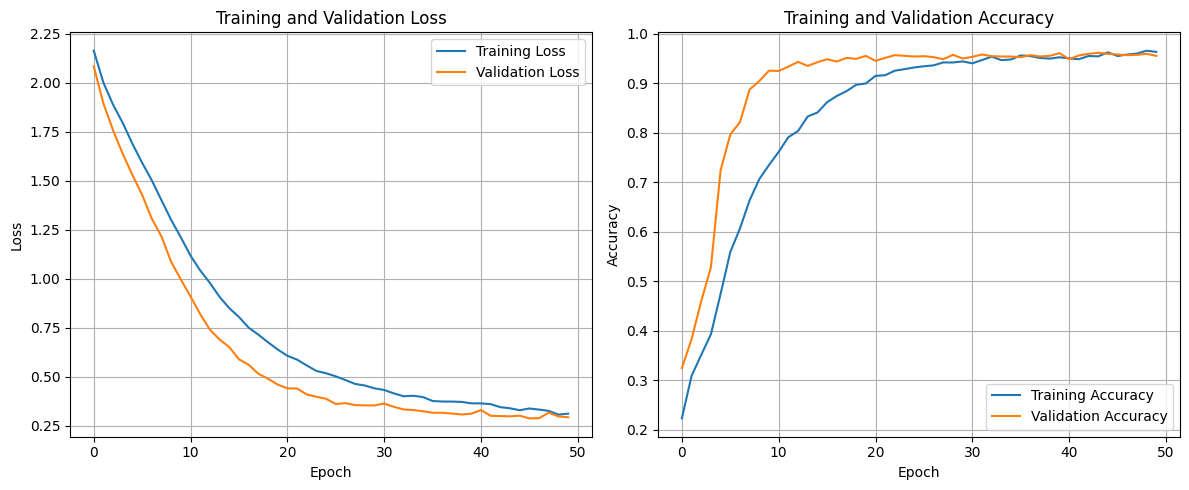

In [59]:
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 플롯
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 정확도 그래프
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 플롯
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()